In [2]:
!pip install pythainlp
!pip install wordcloud

     |████████████████████████████████| 11.0 MB 2.5 MB/s 
     |████████████████████████████████| 743 kB 66.9 MB/s 
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.7.4.3
    Uninstalling typing-extensions-3.7.4.3:
      Successfully uninstalled typing-extensions-3.7.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires typing-extensions~=3.7.4, but you have typing-extensions 3.10.0.2 which is incompatible.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pythainlp import  word_tokenize
from pythainlp.corpus.common import thai_stopwords
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  classification_report

In [4]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
url = "https://raw.githubusercontent.com/PyThaiNLP/thai-sentiment-analysis-dataset/master/general-amy.csv"

In [5]:
df = pd.read_csv(url, sep='\t', names=['text', 'sentiment'],header=None)
df

,text,sentiment
0,อ้าว อยากมีเรื่องหรอวะ ไอ้หัวเกรียน!,neg
1,ขอโทษที่รบกวนคะ,pos
2,รักเธอนะ คนดี,pos
3,เหี้ย สัตว์มึงอย่าเสือกดิ,neg
4,ไอ้คนทรยศ แกอย่าหวังว่าจะตายดี,neg
...,...,...
85,นาฬิกาเรือนดังกล่าว งดงามเหลือเกิน,pos
86,เคนทำอาหารเก่งตั้งแต่เด็กเชียวแหละ,pos
87,โอ๋มันก็อ้วนมาตั้งแต่ไหนแต่ไรแล้วละ หนูเอ๋ย,neg
88,แล้วไอ้วิน มึงจะให้อีดอกฉายไม่ทำเหี้ยไรเลย ไม่...,neg


In [6]:
thai_stopwords = list(thai_stopwords())
thai_stopwords

['นอกจากนี้',
 'เสร็จกัน',
 'อันที่',
 'ทีไร',
 'โดย',
 'จัดการ',
 'ก่อน',
 'นั้น',
 'ช่วงระหว่าง',
 'หลาย',
 'สบาย',
 'แต่ต้อง',
 'เสร็จแล้ว',
 'ก็ตามแต่',
 'ค่อน',
 'ทุกๆ',
 'เป็นอาทิ',
 'ครั้ง',
 '\ufeffๆ',
 'กับ',
 'วันนี้',
 'ยิ่งขึ้น',
 'ยิ่งแล้ว',
 'เพียงแต่',
 'จากนั้น',
 'ใช่',
 'มัน',
 'เฉพาะ',
 'ช่วงก่อน',
 'แต่เดิม',
 'เมื่อครั้งก่อน',
 'เมื่อคราว',
 'นี่เอง',
 'ระยะๆ',
 'ยังคง',
 'พวกคุณ',
 'บางที่',
 'ไหนๆ',
 'ต่างก็',
 'หรือยัง',
 'บอก',
 'ที่นั้น',
 'เท่านี้',
 'ช่วงๆ',
 'ยิ่งจน',
 'ทีเดียว',
 'กว้างขวาง',
 'กลับ',
 'ต่าง',
 'บ้าง',
 'เมื่อนั้น',
 'พื้นๆ',
 'ยังงั้น',
 'นี่แหละ',
 'ขวางๆ',
 'ข้าฯ',
 'เชื่อมั่น',
 'ภายหน้า',
 'ที่ซึ่ง',
 'แท้จริง',
 'จากนี้',
 'มิฉะนั้น',
 'ใครๆ',
 'เป็นการ',
 'ทั้งมวล',
 'อาจจะ',
 'เห็นว่า',
 'กันนะ',
 'ส่วนมาก',
 'อย่างไรเสีย',
 'ภาย',
 'เป็นแต่เพียง',
 'หนอย',
 'ช่วงหลัง',
 'ทั้งหมด',
 'พอแล้ว',
 'ใหญ่ๆ',
 'บางคราว',
 'แห่งนั้น',
 'ยิ่งเมื่อ',
 'ตลอดทั่วทั้ง',
 'เอง',
 'ข้า',
 'หน่อย',
 'ดังเก่า',
 'เช่นนั้นเอง',
 'เพิ่งจะ',
 'จัดให้'

In [7]:
def text_process(text):
  final = ''.join(u for u in text if u not in ('?','.',';',':','!','"','ๆ','ฯ',' '))
  final = word_tokenize(final)
  final = " ".join(word for word in final)
  final = " ".join(word for word in final.split() if word.lower not in thai_stopwords)
  return final

df['text_tokens'] = df['text'].apply(text_process)
df

,text,sentiment,text_tokens
0,อ้าว อยากมีเรื่องหรอวะ ไอ้หัวเกรียน!,neg,อ้าว อยาก มีเรื่อง หรอ วะ ไอ้ หัว เกรียน
1,ขอโทษที่รบกวนคะ,pos,ขอโทษ ที่ รบกวน คะ
2,รักเธอนะ คนดี,pos,รัก เธอ นะ คนดี
3,เหี้ย สัตว์มึงอย่าเสือกดิ,neg,เหี้ย สัตว์ มึง อย่า เสือก ดิ
4,ไอ้คนทรยศ แกอย่าหวังว่าจะตายดี,neg,ไอ้ คน ทรยศ แก อย่า หวัง ว่า จะ ตายดี
...,...,...,...
85,นาฬิกาเรือนดังกล่าว งดงามเหลือเกิน,pos,นาฬิกา เรือน ดังกล่าว งดงาม เหลือเกิน
86,เคนทำอาหารเก่งตั้งแต่เด็กเชียวแหละ,pos,เคน ทำอาหาร เก่ง ตั้งแต่ เด็ก เชียว แหละ
87,โอ๋มันก็อ้วนมาตั้งแต่ไหนแต่ไรแล้วละ หนูเอ๋ย,neg,โอ๋ มัน ก็ อ้วน มา ตั้ง แต่ไหนแต่ไร แล้ว ละ หน...
88,แล้วไอ้วิน มึงจะให้อีดอกฉายไม่ทำเหี้ยไรเลย ไม่...,neg,แล้ว ไอ้ วิน มึง จะ ให้ อีดอก ฉาย ไม่ ทำ เหี้ย...


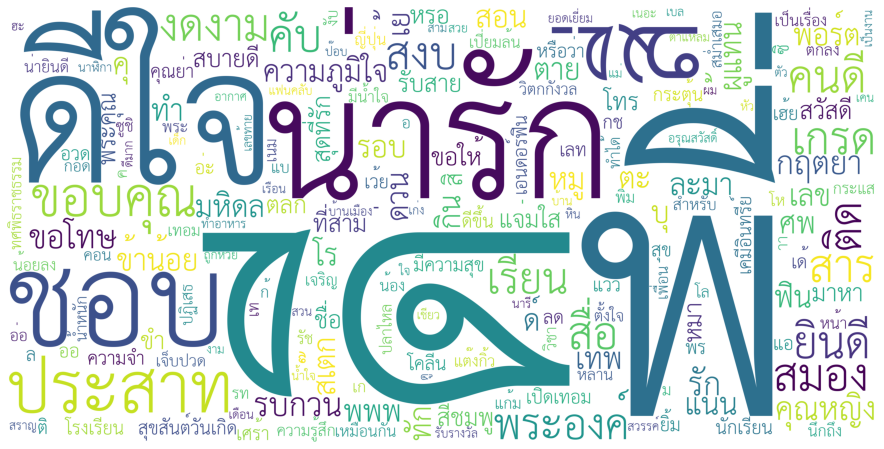

In [8]:
df_pos = df[df['sentiment'] == 'pos']
pos_word_all = ' '.join(text for text in df_pos['text_tokens'])
reg = r'[ก-๙a-zA-Z]+'
fp = 'thsarabunnew-webfont.ttf'
wordcloud = WordCloud(stopwords=thai_stopwords,max_words=2000,background_color='white',height=2000, width=4000,font_path=fp,regexp=reg).generate(pos_word_all)
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

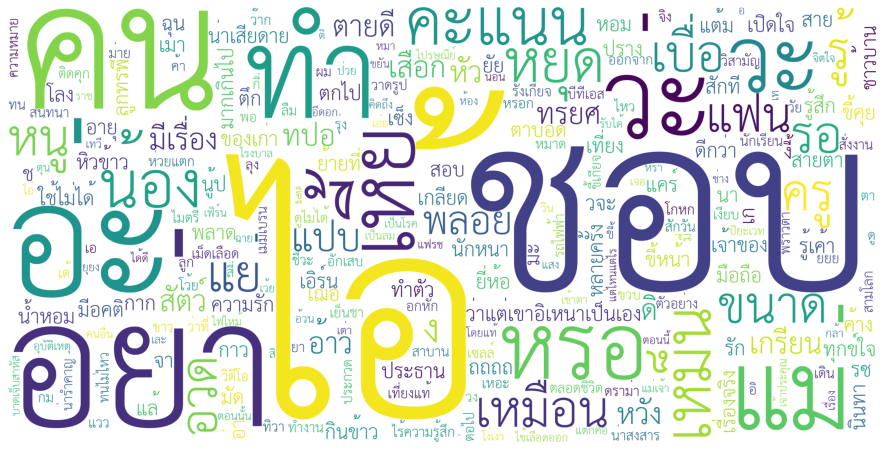

In [9]:
df_neg = df[df['sentiment'] == 'neg']
neg_word_all = ' '.join(text for text in df_neg['text_tokens'])
reg = r'[ก-๙a-zA-Z]+'
fp = 'thsarabunnew-webfont.ttf'
wordcloud = WordCloud(stopwords=thai_stopwords,max_words=2000,background_color='white',height=2000, width=4000,font_path=fp,regexp=reg).generate(neg_word_all)
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [10]:
x = df[['text_tokens']]
y = df['sentiment']

x_train, x_test , y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=101)

In [11]:
cvec = CountVectorizer(analyzer=lambda x:x.split(' '))
cvec.fit_transform(x_train['text_tokens'])

cvec.vocabulary_

{'05': 0,
 '16': 1,
 '2': 2,
 '5555555555': 3,
 '_': 4,
 'กม': 5,
 'กฤตยา': 6,
 'กล้า': 7,
 'กอด': 8,
 'กัน': 9,
 'กับ': 10,
 'กิน': 11,
 'กี่': 12,
 'กู': 13,
 'ก็': 14,
 'ก้': 15,
 'ขนาด': 16,
 'ขยัน': 17,
 'ขวบ': 18,
 'ขอ': 19,
 'ของ': 20,
 'ของเก่า': 21,
 'ขอบคุณ': 22,
 'ขอให้': 23,
 'ขั้น': 24,
 'ขาว': 25,
 'ขำ': 26,
 'ขี้คุย': 27,
 'ขี้เกียจ': 28,
 'ขึ้น': 29,
 'ค': 30,
 'คน': 31,
 'คนดี': 32,
 'ครับ': 33,
 'ครั้ง': 34,
 'ครู': 35,
 'ความรัก': 36,
 'ความรู้สึก': 37,
 'ความหมาย': 38,
 'คอน': 39,
 'คะแนน': 40,
 'คับ': 41,
 'คิดถึง': 42,
 'คุ': 43,
 'คุณ': 44,
 'คุณย่า': 45,
 'คุณหญิง': 46,
 'ค่ะ': 47,
 'ค้า': 48,
 'ค้าง': 49,
 'ง': 50,
 'งดงาม': 51,
 'งับ': 52,
 'งาม': 53,
 'จน': 54,
 'จริง': 55,
 'จะ': 56,
 'จัง': 57,
 'จาก': 58,
 'จิง': 59,
 'จิตใจ': 60,
 'จ้ะ': 61,
 'จ้า': 62,
 'ฉัน': 63,
 'ฉุน': 64,
 'ช': 65,
 'ชอบ': 66,
 'ชีวะ': 67,
 'ชื่อ': 68,
 'ช่วย': 69,
 'ซะ': 70,
 'ซูชิ': 71,
 'ญี่ปุ่น': 72,
 'ฐิ': 73,
 'ดราม่า': 74,
 'ดังกล่าว': 75,
 'ดั่ง': 76,
 'ดี': 77,
 'ดีใจ': 78,


In [12]:
train_bow = cvec.transform(x_train['text_tokens'])

pd.DataFrame(train_bow.toarray(),columns=cvec.get_feature_names(),index=x_train['text_tokens'])

,05,16,2,5555555555,_,กม,กฤตยา,กล้า,กอด,กัน,กับ,กิน,กี่,กู,ก็,ก้,ขนาด,ขยัน,ขวบ,ขอ,ของ,ของเก่า,ขอบคุณ,ขอให้,ขั้น,ขาว,ขำ,ขี้คุย,ขี้เกียจ,ขึ้น,ค,คน,คนดี,ครับ,ครั้ง,ครู,ความรัก,ความรู้สึก,ความหมาย,คอน,...,แย่,และ,แล้,แล้ว,แวว,แสง,แหละ,โง่เง่า,โทร,โร,โรงบาล,โล,โลง,โว้ย,โห,โอ๋,ใกล้,ใคร,ใจ,ใช้,ใช้ไม่ได้,ใน,ให้,ไข้เลือดออก,ได้,ได้ดี,ไป,ไปรษณีย์,ไฟไหม้,ไมตรี,ไม่,ไม่เป็นไร,ไร,ไร้ความรู้สึก,ไหว,ไอ้,,👵,😭,🙏
text_tokens,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
โอ๋ มัน ก็ อ้วน มา ตั้ง แต่ไหนแต่ไร แล้ว ละ หนู เอ๋ย,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
สวัสดี ครับ หมา คุณ น่ารัก จัง เลย มัน ชื่อ อะไร หรอ คับ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5555555555 ขำ จัง เลย ตลก ดี ชอบ,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
เจ้าประคุณ ฉัน ไม่ เคย เจอ ใคร ขยัน ใน เรื่อง โง่เง่า เต่า ตุน ได้ดี เท่า เท อ เลย,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
สุดที่รัก เธอ โทร มาหา ช่วย รับสาย หน่อย สิ จ้ะ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
แม่เจ้า น้อง หมา ทำ ห้อง เละ อีก หรอ เป็นลม แปบ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ฐิ ตา แม่ ง เย็นชา ที่สุด ใน สามโลก,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ทำได้ แล้ว ดีใจ มาก,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
lr = LogisticRegression()
lr.fit(train_bow,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
test_bow = cvec.transform(x_test['text_tokens'])
test_prediction = lr.predict(test_bow)

print(classification_report(test_prediction,y_test))

              precision    recall  f1-score   support

         neg       0.58      0.78      0.67         9
         pos       0.87      0.72      0.79        18

    accuracy                           0.74        27
   macro avg       0.73      0.75      0.73        27
weighted avg       0.77      0.74      0.75        27



In [15]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=lr,n_estimators=14, random_state=0)
clf.fit(train_bow, y_train)
test_predictionc = clf.predict(test_bow)

print(classification_report(test_predictionc,y_test))

              precision    recall  f1-score   support

         neg       0.75      0.82      0.78        11
         pos       0.87      0.81      0.84        16

    accuracy                           0.81        27
   macro avg       0.81      0.82      0.81        27
weighted avg       0.82      0.81      0.82        27



In [17]:
my_text = str(input())
my_tokens = text_process(my_text)
my_bow = cvec.transform(pd.Series([my_tokens]))
my_prediction = clf.predict(my_bow)
my_prediction

สุชใดเล่าจะเท่ากับสุขใจ


array(['neg'], dtype=object)